# Analisi dei giorni tra la data inizio variazione e fine variazione dei picchi NFT con 3 giorni successivi (sia positivi che negativi) esaminando anche la sentiment analysis dei tweet e il punteggio totale (di ogni singolo tweet) che mi serve a capire quali sono stati i tweet più influenti

### Importazione librerie e datadrames

In [25]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter, DayLocator
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from tabulate import tabulate
from scipy.stats import pearsonr

In [26]:
# Caricamento dei dataset
top_nft_positivi = pd.read_csv("../dataframes/top_nft_positivi_df.csv")
top_nft_negativi = pd.read_csv("../dataframes/top_nft_negativi_df.csv")
tweets_sentiment = pd.read_csv("../dataframes/tweets_sentiment_df.csv") 
tweets_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")

# Converti le colonne delle date in formato datetime
top_nft_positivi['data_inizio'] = pd.to_datetime(top_nft_positivi['data_inizio'])
top_nft_negativi['data_inizio'] = pd.to_datetime(top_nft_negativi['data_inizio'])
top_nft_positivi['data_fine'] = pd.to_datetime(top_nft_positivi['data_fine'])
top_nft_negativi['data_fine'] = pd.to_datetime(top_nft_negativi['data_fine'])
tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

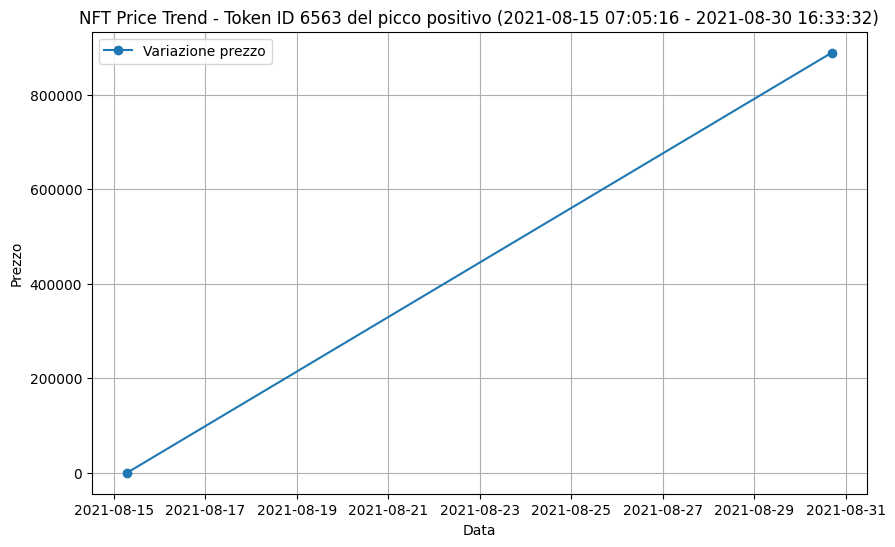

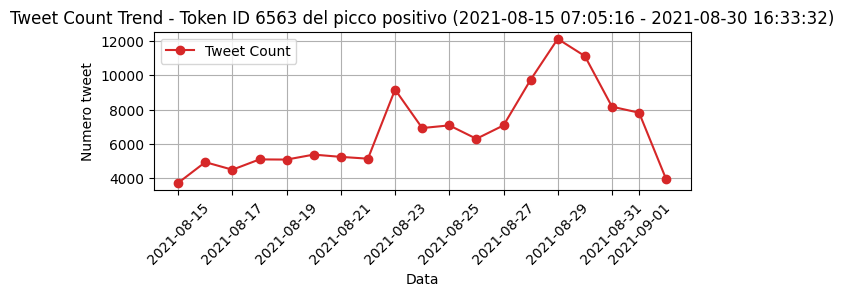

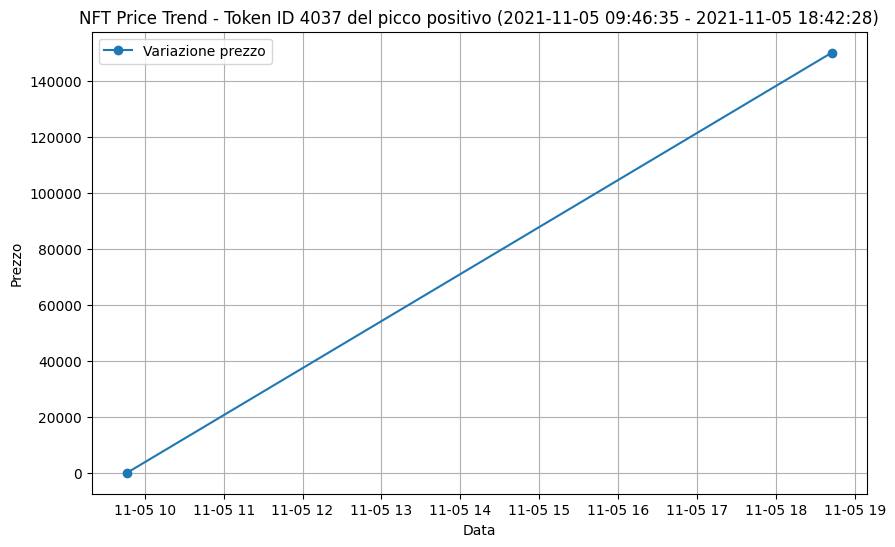

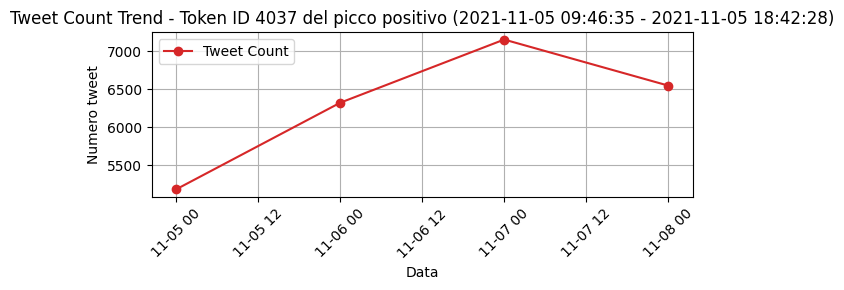

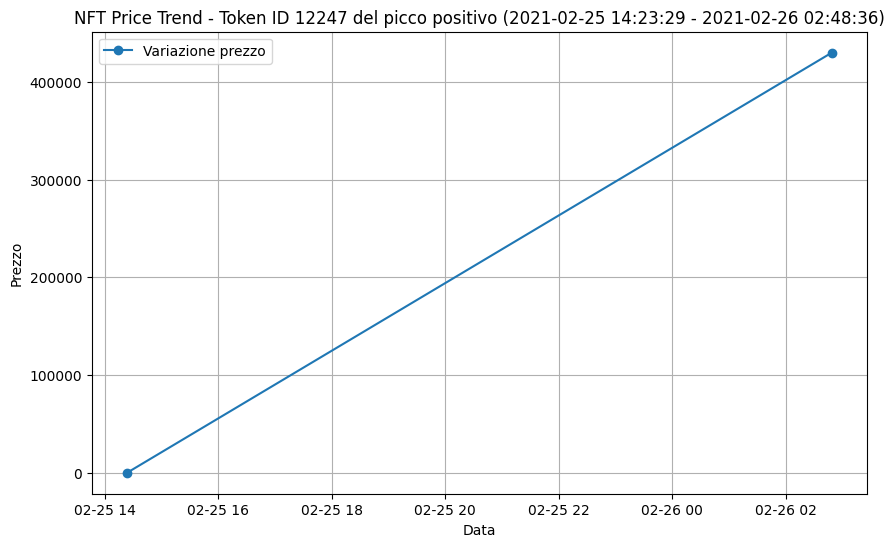

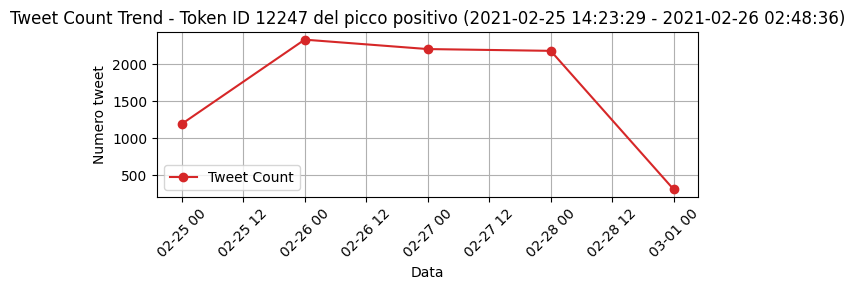

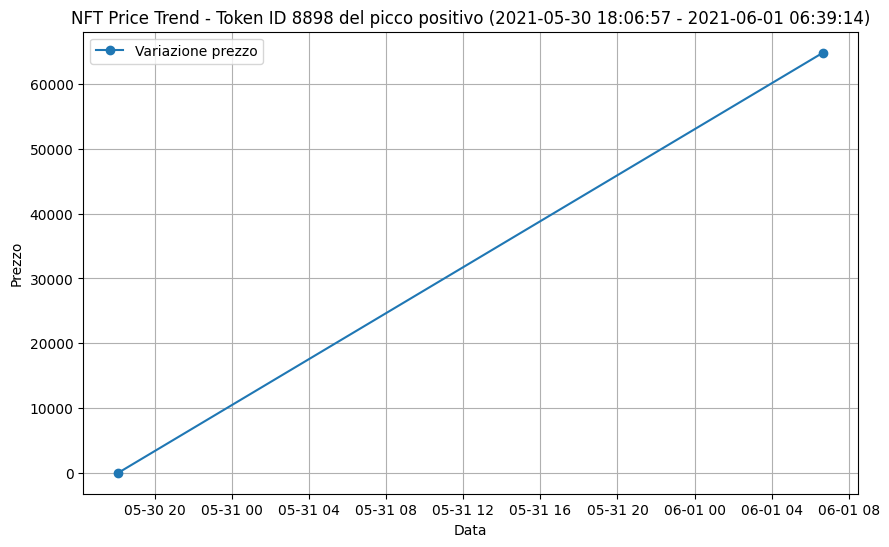

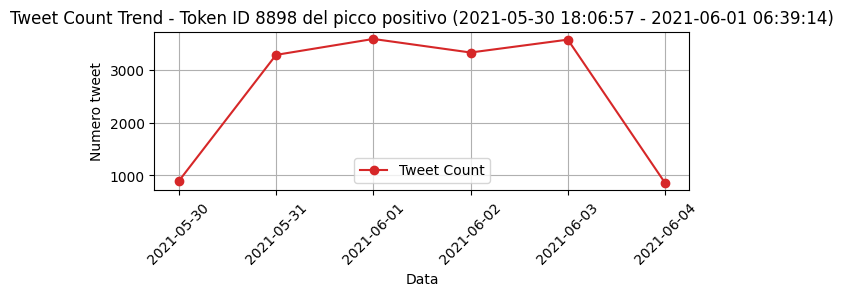

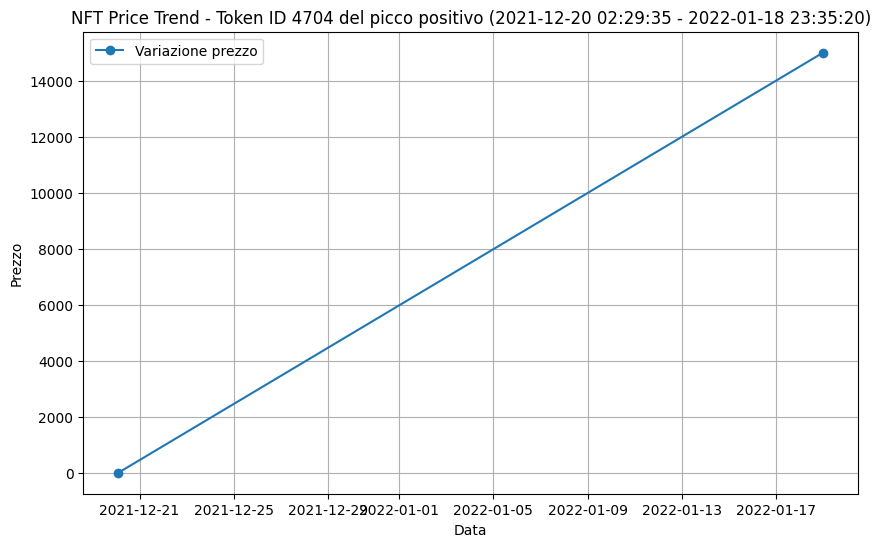

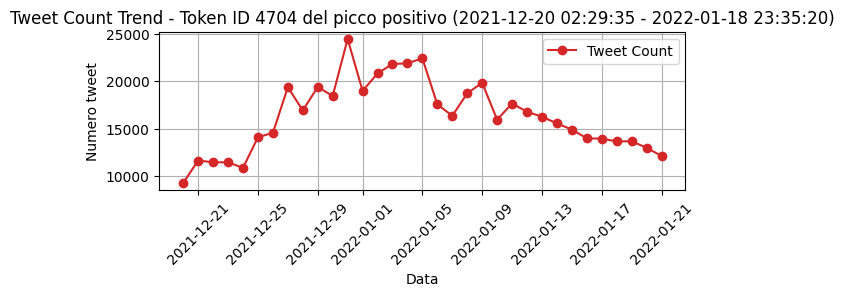

Picco NFT: 1
Coefficiente di correlazione di Pearson: 1.0000
P-value: 1.0000
Non c'è alcuna evidenza di una correlazione tra il numero di tweet e l'aumento dei prezzi degli NFT.
***********************************
Picco NFT: 2
Coefficiente di correlazione di Pearson: 0.9908
P-value: 0.0863
Esiste una correlazione positiva tra il numero di tweet e l'aumento dei prezzi degli NFT.
***********************************
Picco NFT: 3
Coefficiente di correlazione di Pearson: 0.9919
P-value: 0.0081
Esiste una correlazione positiva tra il numero di tweet e l'aumento dei prezzi degli NFT.
***********************************
Picco NFT: 4
Coefficiente di correlazione di Pearson: -0.0095
P-value: 0.9878
Esiste una correlazione negativa tra il numero di tweet e l'aumento dei prezzi degli NFT.
***********************************


In [27]:
num_tweet_per_picco = []
variazioni_prezzo_per_picco = []
picchi_calcolati = 0
risultati_correlazione = {}

# Iterazione su ciascun picco positivo di NFT
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    prezzo_inizio = row['prezzo_inizio']
    prezzo_fine = row['prezzo_fine']
    token_id = row['token_id']
    
    # Filtra i tweet che sono stati fatti nei giorni successivi all'inizio della variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_variazione) & 
        (tweets_sentiment['created_at'] <= data_fine_variazione + pd.DateOffset(days=3)) 
    ]
    
    # Conta il numero totale di tweet per questo picco positivo
    numero_totale_tweet = len(tweets_filtrati)
    
    # Aggiungi la variazione percentuale del prezzo per questo picco
    variazione_prezzo = row['percentuale_variazione']
    
    # Aggiungi i dati alla lista per l'analisi di correlazione
    num_tweet_per_picco.append(numero_totale_tweet)
    variazioni_prezzo_per_picco.append(variazione_prezzo)
    
    plt.figure(figsize=(10,6))
    
    # Creiamo una lista di date e prezzi
    dates = [data_inizio_variazione, data_fine_variazione]
    prices = [prezzo_inizio, prezzo_fine]

    # Grafico NFT price trend
    plt.plot(dates, prices, marker='o', linestyle='-', label=f'Variazione prezzo')
    plt.title(f'NFT Price Trend - Token ID {token_id} del picco positivo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.xlabel('Data')
    plt.ylabel('Prezzo')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Grafico tweet count trend
    plt.subplot(2, 1, 2)
    tweet_counts = tweets_filtrati.resample('D', on='created_at').size()
    plt.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='tab:red', label='Tweet Count')
    plt.title(f'Tweet Count Trend - Token ID {token_id} del picco positivo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.xlabel('Data')
    plt.ylabel('Numero tweet')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

# Aggiungi i risultati della correlazione per questo picco (se ci sono almeno due picchi calcolati)
    picchi_calcolati += 1
    if picchi_calcolati >= 2:
        correlation_coefficient, p_value = pearsonr(num_tweet_per_picco, variazioni_prezzo_per_picco)
        risultati_correlazione[index] = {
            'coefficiente': correlation_coefficient,
            'p_value': p_value,
            'num_tweet': num_tweet_per_picco.copy(),
            'variazione_prezzo': variazioni_prezzo_per_picco.copy()
        }

# Stampa i risultati della correlazione per ogni picco
for index, risultato in risultati_correlazione.items():
    coeff = risultato['coefficiente']
    p_value = risultato['p_value']
    num_tweet = risultato['num_tweet']
    variazione_prezzo = risultato['variazione_prezzo']
    
    print(f"Picco NFT: {index}")
    print(f"Coefficiente di correlazione di Pearson: {coeff:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value == 1.0000:
        print("Non c'è alcuna evidenza di una correlazione tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    elif coeff > 0:
        print("Esiste una correlazione positiva tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    elif coeff < 0:
        print("Esiste una correlazione negativa tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    else:
        print("Non c'è una correlazione lineare tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    
    print("***********************************")

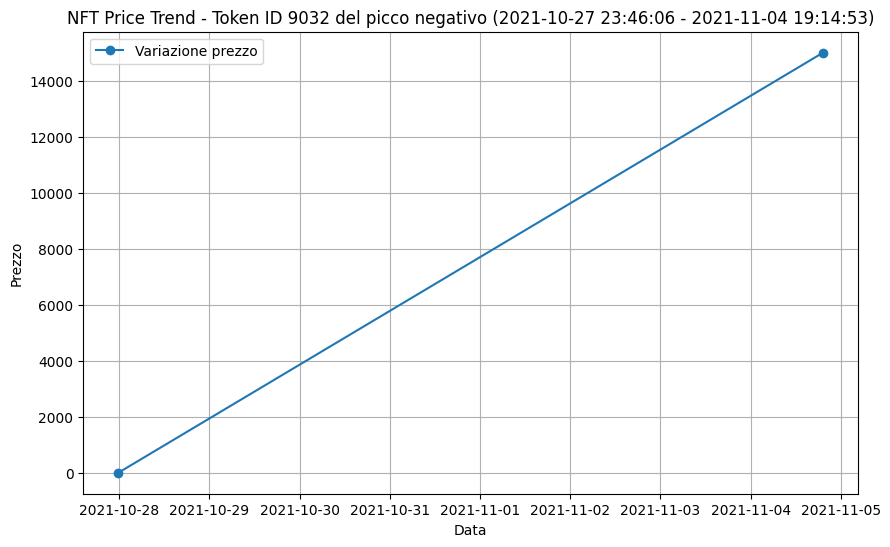

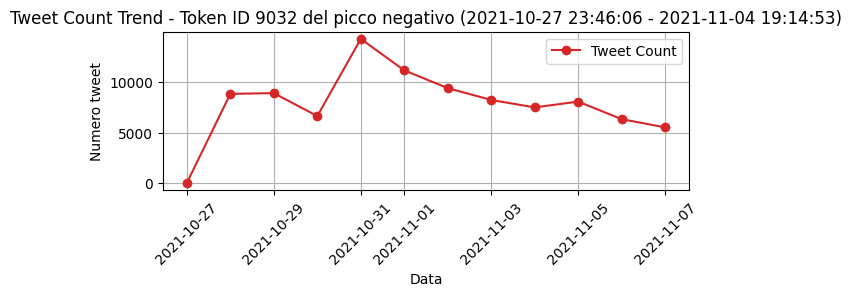

In [28]:
num_tweet_per_picco = []
variazioni_prezzo_per_picco = []
picchi_calcolati = 0
risultati_correlazione = {}

# Iterazione su ciascun picco positivo di NFT
for index, row in top_nft_negativi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    token_id = row['token_id']
    
    # Filtra i tweet che sono stati fatti nei giorni successivi all'inizio della variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_variazione) & 
        (tweets_sentiment['created_at'] <= data_fine_variazione + pd.DateOffset(days=3)) 
    ]
    
    # Conta il numero totale di tweet per questo picco positivo
    numero_totale_tweet = len(tweets_filtrati)
    
    # Aggiungi la variazione percentuale del prezzo per questo picco
    variazione_prezzo = row['percentuale_variazione']
    
    # Aggiungi i dati alla lista per l'analisi di correlazione
    num_tweet_per_picco.append(numero_totale_tweet)
    variazioni_prezzo_per_picco.append(variazione_prezzo)
    
    plt.figure(figsize=(10,6))

    # Creiamo una lista di date e prezzi
    dates = [data_inizio_variazione, data_fine_variazione]
    prices = [prezzo_inizio, prezzo_fine]

    # Grafico NFT price trend
    plt.plot(dates, prices, marker='o', linestyle='-', label=f'Variazione prezzo')
    plt.title(f'NFT Price Trend - Token ID {token_id} del picco negativo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.xlabel('Data')
    plt.ylabel('Prezzo')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Grafico tweet count trend
    plt.subplot(2, 1, 2)
    tweet_counts = tweets_filtrati.resample('D', on='created_at').size()
    plt.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='tab:red', label='Tweet Count')
    plt.title(f'Tweet Count Trend - Token ID {token_id} del picco negativo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.xlabel('Data')
    # plt.scatter(tweet_counts['created_at'].dt.strftime('%d-%m'))
    plt.ylabel('Numero tweet')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

# Aggiungi i risultati della correlazione per questo picco (se ci sono almeno due picchi calcolati)
    picchi_calcolati += 1
    if picchi_calcolati >= 2:
        correlation_coefficient, p_value = pearsonr(num_tweet_per_picco, variazioni_prezzo_per_picco)
        risultati_correlazione[index] = {
            'coefficiente': correlation_coefficient,
            'p_value': p_value,
            'num_tweet': num_tweet_per_picco.copy(),
            'variazione_prezzo': variazioni_prezzo_per_picco.copy()
        }

# Stampa i risultati della correlazione per ogni picco
for index, risultato in risultati_correlazione.items():
    coeff = risultato['coefficiente']
    p_value = risultato['p_value']
    num_tweet = risultato['num_tweet']
    variazione_prezzo = risultato['variazione_prezzo']
    
    print(f"Picco NFT: {index}")
    print(f"Coefficiente di correlazione di Pearson: {coeff:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value == 1.0000:
        print("Non c'è alcuna evidenza di una correlazione tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    elif coeff > 0:
        print("Esiste una correlazione positiva tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    elif coeff < 0:
        print("Esiste una correlazione negativa tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    else:
        print("Non c'è una correlazione lineare tra il numero di tweet e l'aumento dei prezzi degli NFT.")
    
    print("***********************************")